In [285]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, spearmanr

In [286]:
# import dataset
# the lambda function prevents an extra unnamed column from being added that seems to be contained in the dataset
df = pd.read_csv("data without infertility _final.csv", index_col=0, usecols=lambda col: not col.startswith("Unnamed:"))
df.head()

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,,,,,,,,,,,,,,,,,,,,,
1,10001,0,28,44.6,152.0,19.300000,15,78,22,10.48,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
2,10002,0,36,65.0,161.5,24.921163,15,74,20,11.70,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
3,10003,1,33,68.8,165.0,25.270891,11,72,18,11.80,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
4,10004,0,37,65.0,148.0,29.674945,13,72,20,12.00,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
5,10005,0,25,52.0,161.0,20.060954,11,72,18,10.00,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


Before we go further, we will rename the Marraige Status (Yrs) column to Marriage Status (Years) and " Age (yrs)" to "Age (years)".

In [287]:
# rename Marraige Status (Yrs) to Marriage Status (Years)
df = df.rename(columns={"Marraige Status (Yrs)": "Marriage Status (Years)", " Age (yrs)": "Age (years)"})

Let's now take a look at if there are any null values in the dataset.

In [288]:
# check for nulls
df.isnull().sum()

Patient File No.           0
PCOS (Y/N)                 0
Age (years)                0
Weight (Kg)                0
Height(Cm)                 0
BMI                        0
Blood Group                0
Pulse rate(bpm)            0
RR (breaths/min)           0
Hb(g/dl)                   0
Cycle(R/I)                 0
Cycle length(days)         0
Marriage Status (Years)    1
Pregnant(Y/N)              0
No. of aborptions          0
FSH(mIU/mL)                0
LH(mIU/mL)                 0
FSH/LH                     0
Hip(inch)                  0
Waist(inch)                0
Waist:Hip Ratio            0
TSH (mIU/L)                0
AMH(ng/mL)                 0
PRL(ng/mL)                 0
Vit D3 (ng/mL)             0
PRG(ng/mL)                 0
RBS(mg/dl)                 0
Weight gain(Y/N)           0
hair growth(Y/N)           0
Skin darkening (Y/N)       0
Hair loss(Y/N)             0
Pimples(Y/N)               0
Fast food (Y/N)            1
Reg.Exercise(Y/N)          0
BP _Systolic (

As we can see, there is a single null value in Marriage Status (Years) and one in Fast food (Y/N). For the former 2, we will simply use the median and mode, respectively, as Marriage Status is an integer value and Fast food is a boolean (at least, it should be a boolean). 

In [289]:
# get median of marriage status and round to 1 decimal place
marriage_status_median = df["Marriage Status (Years)"].median()
print("Marriage status mean:", marriage_status_median)
# fill in any null values for marriage status (in this case, just 1) with the mean 

df.loc[df["Marriage Status (Years)"].isna(), "Marriage Status (Years)"] = marriage_status_median

Marriage status mean: 7.0


In [290]:
# check value counts for fast food (specifically to find mode)
df["Fast food (Y/N)"].value_counts()

Fast food (Y/N)
1.0    278
0.0    262
Name: count, dtype: int64

In [291]:
# we will use the mode (1) to fill in the null value
df.loc[df["Fast food (Y/N)"].isna(), "Fast food (Y/N)"] = 1

In [292]:
# check again for nulls
df.isnull().sum()

Patient File No.           0
PCOS (Y/N)                 0
Age (years)                0
Weight (Kg)                0
Height(Cm)                 0
BMI                        0
Blood Group                0
Pulse rate(bpm)            0
RR (breaths/min)           0
Hb(g/dl)                   0
Cycle(R/I)                 0
Cycle length(days)         0
Marriage Status (Years)    0
Pregnant(Y/N)              0
No. of aborptions          0
FSH(mIU/mL)                0
LH(mIU/mL)                 0
FSH/LH                     0
Hip(inch)                  0
Waist(inch)                0
Waist:Hip Ratio            0
TSH (mIU/L)                0
AMH(ng/mL)                 0
PRL(ng/mL)                 0
Vit D3 (ng/mL)             0
PRG(ng/mL)                 0
RBS(mg/dl)                 0
Weight gain(Y/N)           0
hair growth(Y/N)           0
Skin darkening (Y/N)       0
Hair loss(Y/N)             0
Pimples(Y/N)               0
Fast food (Y/N)            0
Reg.Exercise(Y/N)          0
BP _Systolic (

Now that there are no more null values in the dataset, we will move on to converting columns to suitable types. 

First, let's get a summary of all the types in the dataset.

In [293]:
# show all datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 1 to 541
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient File No.         541 non-null    int64  
 1   PCOS (Y/N)               541 non-null    int64  
 2   Age (years)              541 non-null    int64  
 3   Weight (Kg)              541 non-null    float64
 4   Height(Cm)               541 non-null    float64
 5   BMI                      541 non-null    float64
 6   Blood Group              541 non-null    int64  
 7   Pulse rate(bpm)          541 non-null    int64  
 8   RR (breaths/min)         541 non-null    int64  
 9   Hb(g/dl)                 541 non-null    float64
 10  Cycle(R/I)               541 non-null    int64  
 11  Cycle length(days)       541 non-null    int64  
 12  Marriage Status (Years)  541 non-null    float64
 13  Pregnant(Y/N)            541 non-null    int64  
 14  No. of aborptions        541 no

There are a few changes we could make. There are several columns with boolean values (namely the ones with Y/N in the column name) but have the int64 type. We can change the types of these columns to boolean.

In [294]:
# Converting any columns with Y/N in the column name to boolean (except for Fast food, we address that in the next cells).
#Iterating over columns
for column in df.columns:
    #Checking if column name contains 'Y/N'
    if 'Y/N' in column:
        #Converting column values to boolean
        df[column] = df[column].astype(bool)

#Displaying data types after conversion
print(df.dtypes)

Patient File No.             int64
PCOS (Y/N)                    bool
Age (years)                  int64
Weight (Kg)                float64
Height(Cm)                 float64
BMI                        float64
Blood Group                  int64
Pulse rate(bpm)              int64
RR (breaths/min)             int64
Hb(g/dl)                   float64
Cycle(R/I)                   int64
Cycle length(days)           int64
Marriage Status (Years)    float64
Pregnant(Y/N)                 bool
No. of aborptions            int64
FSH(mIU/mL)                float64
LH(mIU/mL)                 float64
FSH/LH                     float64
Hip(inch)                    int64
Waist(inch)                  int64
Waist:Hip Ratio            float64
TSH (mIU/L)                float64
AMH(ng/mL)                  object
PRL(ng/mL)                 float64
Vit D3 (ng/mL)             float64
PRG(ng/mL)                 float64
RBS(mg/dl)                 float64
Weight gain(Y/N)              bool
hair growth(Y/N)    

In [295]:
df["Fast food (Y/N)"].value_counts()

Fast food (Y/N)
True     279
False    262
Name: count, dtype: int64

Because 0 and 1 are the only values, we do not need the type to be float64. We can change this to boolean (as we did the other columns with Y/N in the name).

In [296]:
# Converting Fast food column to boolean
# Mapping numerical values to boolean
df["Fast food (Y/N)"] = df["Fast food (Y/N)"].astype(bool)

#Checking the conversion
print(df["Fast food (Y/N)"].value_counts())

Fast food (Y/N)
True     279
False    262
Name: count, dtype: int64


Next, we will check for and delete any duplicate rows in the data.

In [297]:
# print out shape of data
df.shape

(541, 41)

In [298]:
# drop any duplicates
df.drop_duplicates(inplace=True)
# print out shape again
df.shape

(541, 41)

As we can see, there are no duplicate entries in the dataset, as the shape stayed the same post-deletion.

We are now done with preparing the data, so we will begin doing some visualizations to help us get a better understanding of the dataset and help inform our analysis later on. We will start by looking at some of the explanatory variables and their potential relation to whether or not a patient was diagnosed with PCOS to find potential correlations.

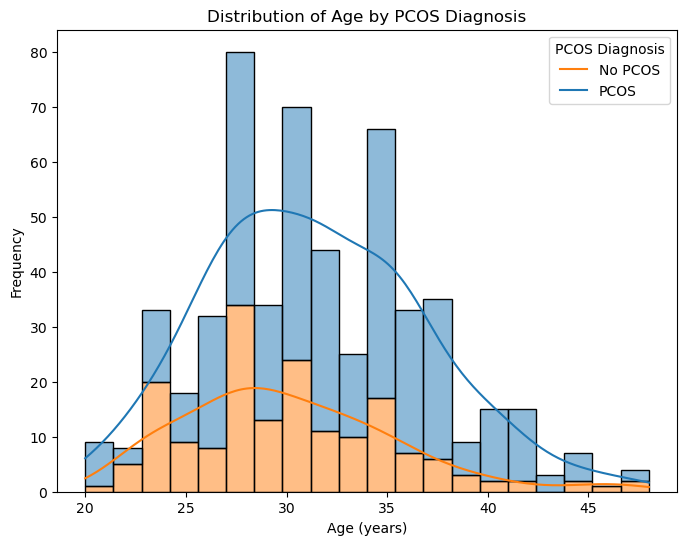

In [299]:
# Visualization 1 
# Histogram of Age

plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Age (years)', hue='PCOS (Y/N)', bins=20, kde=True, multiple='stack')
plt.title('Distribution of Age by PCOS Diagnosis')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.legend(title='PCOS Diagnosis', labels=['No PCOS', 'PCOS'])
plt.show()

In this stacked histogram, we can see the distribution of ages amongst patients who are diagnosed with PCOS and patients who are not. In both, we can see that the peak age in the data set is around 27 years. An important feature we can notice is that the data is somewhat normally distributed between these two variables.

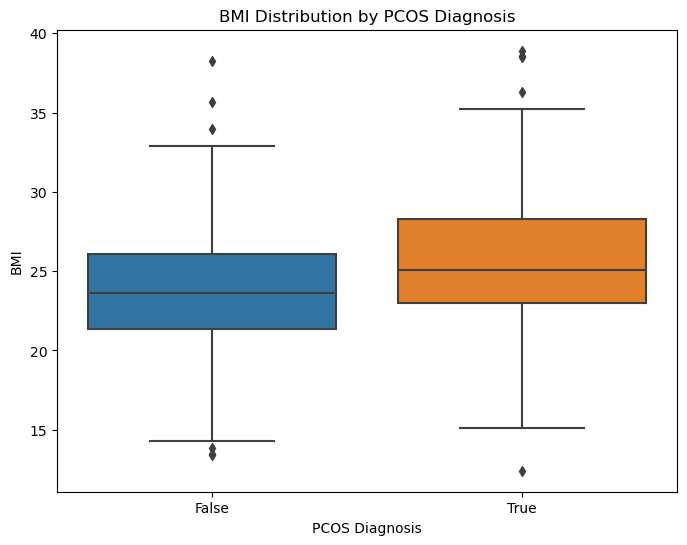

In [300]:
# Visualization 2 
# Box plot of BMI by PCOS diagnosis
plt.figure(figsize=(8,6))
sns.boxplot(x='PCOS (Y/N)', y='BMI', data=df)
plt.title('BMI Distribution by PCOS Diagnosis')
plt.xlabel('PCOS Diagnosis')
plt.ylabel('BMI')
plt.show()

In this box plot, we can notice that the interquartile interval (the box itself) for patients who are not diagnosed with PCOS is lower overall than those with PCOS, meaning there appears to be some correlation between a higher BMI and a positive PCOS diagnosis.

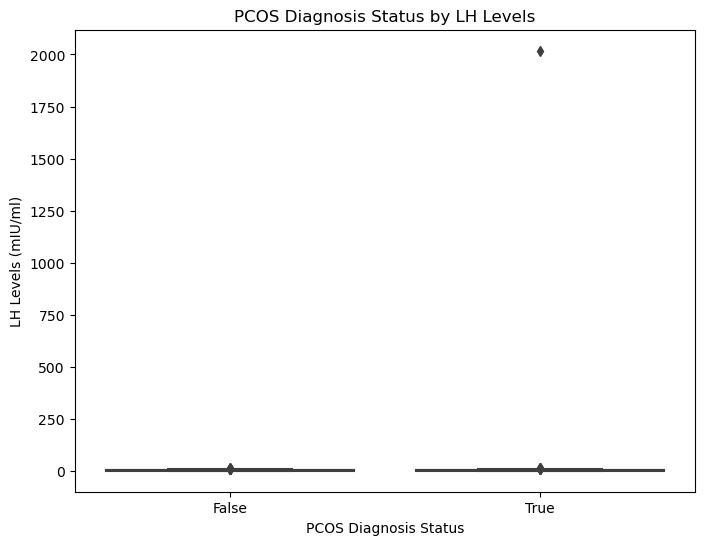

In [301]:
# Visualization 3 
# Scatter plot of BMI vs. LH levels
plt.figure(figsize=(8,6))
sns.boxplot(x='PCOS (Y/N)', y='LH(mIU/mL)', data=df)
plt.title('PCOS Diagnosis Status by LH Levels')
plt.xlabel('PCOS Diagnosis Status')
plt.ylabel('LH Levels (mIU/ml)')
plt.show()


Clearly, there is a massive outlier in the data that makes the graph very difficult to analyze. Let's check to see what might be going on by using describe() on the column.

In [302]:
# check important statistical measures for LH
df['LH(mIU/mL)'].describe()

count     541.000000
mean        6.469919
std        86.673255
min         0.020000
25%         1.020000
50%         2.300000
75%         3.680000
max      2018.000000
Name: LH(mIU/mL), dtype: float64

The max value is 2018, significantly higher than the minimum and any of the quartile measures. Thus, it is likely that this is an outlier. Here, we will replace it using the mean value of LH, since there don't appear to be other outliers.

In [303]:
# replace the outlier value with the mean for LH, then describe again to see max value and verify that update occurred
df.loc[df['LH(mIU/mL)'] > 2000, 'LH(mIU/mL)'] = df['LH(mIU/mL)'].mean()
df['LH(mIU/mL)'].describe()

count    541.000000
mean       2.751748
std        2.311096
min        0.020000
25%        1.020000
50%        2.300000
75%        3.680000
max       14.690000
Name: LH(mIU/mL), dtype: float64

Let's now plot the graph in the same way we did earlier.

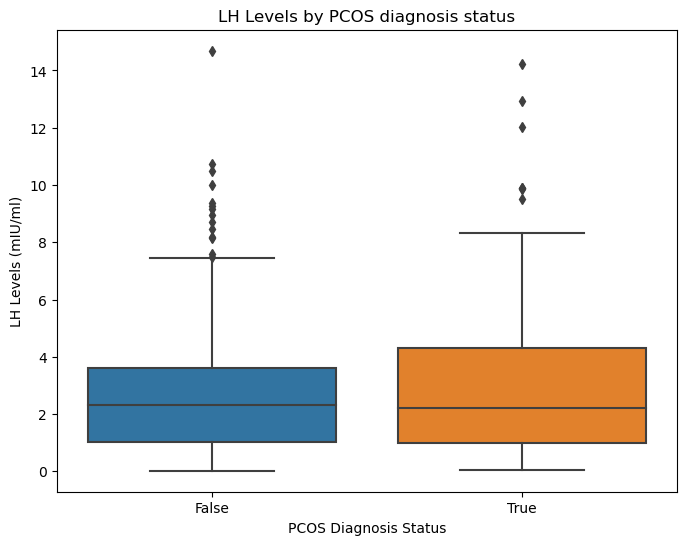

In [304]:
plt.figure(figsize=(8,6))
sns.boxplot(x='PCOS (Y/N)', y='LH(mIU/mL)', data=df)
plt.title('LH Levels by PCOS diagnosis status')
plt.xlabel('PCOS Diagnosis Status')
plt.ylabel('LH Levels (mIU/ml)')
plt.show()

In this chart, we can see that the minimum, maximum, and 3rd quartile LH levels among those diagnosed with PCOS are higher than those who do not have PCOS. However, it is also interesting to note that there is a greater interquartile range among those who do have PCOS compared to those who do not, and the first quartile and median LH levels amongst both groups are approximately equal. 

# Hypothesis Testing

In [305]:
# Visualization 1's Hypothesis(1): Is there a difference in mean age between individuals diagnosed with PCOS and those not diagnosed?
pcos_yes_age = df[df['PCOS (Y/N)'] == 1]['Age (years)']
pcos_no_age = df[df['PCOS (Y/N)'] == 0]['Age (years)']
t_stat, p_value = ttest_ind(pcos_yes_age, pcos_no_age)
print(f"T-test result - t-statistic: {t_stat.round(2)}, p-value: {p_value.round(2)}")

T-test result - t-statistic: -3.97, p-value: 0.0


The t-test analysis reveals a significant difference in the mean age between indiciduals diagnosed with PCOS and those without diagnosis. Specifically, the negative t-statistic suggests that the average age of individuals with PCOS tends to be lower than those without the condition. Furthermore, the notably small p-value (approximately 0 when rounding) provides strong evidence against the null hypothesis, indicating that this observed age differences is unlikely to occur by random chance.

In [306]:
# Visualization 2's Hypothesis(2): Is there an association between PCOS diagnosis and fast food consumption?
contingency_table = pd.crosstab(df['PCOS (Y/N)'], df['Fast food (Y/N)'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square test result - Chi2 statistic: {chi2_stat.round(2)}, p-value: {p_value.round(2)}")

Chi-square test result - Chi2 statistic: 74.96, p-value: 0.0


The chi-square test yielded a significant result (x2 statistic = 74.96, p < 0.05), indicating an association between PCOS diagnosis and fast food consumption. This suggests that individuals diagnosed with PCOS may demonstrate distinct patterns of fast food consumption compared to those without PCOS. 

In [307]:
# Visualization 3's Hypothesis(3): Is there a correlation between PCOS and LH levels?
rho, p_value = spearmanr(df['PCOS (Y/N)'], df['LH(mIU/mL)'])
print(f"Spearman correlation result - Correlation coefficient: {rho.round(2)}, p-value: {p_value.round(2)}")

Spearman correlation result - Correlation coefficient: 0.04, p-value: 0.36


The analysis indicates a negligible correlation (we can note that Spearman's rho is approximately 0.04) between PCOS diagnosis status and LH levels. With a p-value of 0.36, the correlation is not statistically significant at the customary significance level of 0.05. Hence, there seems to  be insufficient evidence to assert a substantive relationship between PCOS diagnosis status and LH levels in this dataset.